<a href="https://colab.research.google.com/github/IUBAYAR/MIS-351/blob/main/28052024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:



import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

Ülker sells 100 gram Albeni chocolate bars for 30 cents. Actually they pack an ingredient that has a mean 100 grams and a standard deviation .55 grams.
*   Normally the profit margin is 30%,
*   If a lighter bar is sold for the same price, some extra profit would be earned,
*   similarly if a heavier bar is sold for the same price some profit decrease is experienced.
*   Moreover, if any bar less than 98 grams is detected during an inspection, Ülker pays a fine of $2000.
*   But, an inspection only examines %0.5 of a production party.

Try different target product weights (integral) from 95 grams to 103 grams, which target mean weight is more profitable? You are to sell 400ooo bars.



<Axes: ylabel='Count'>

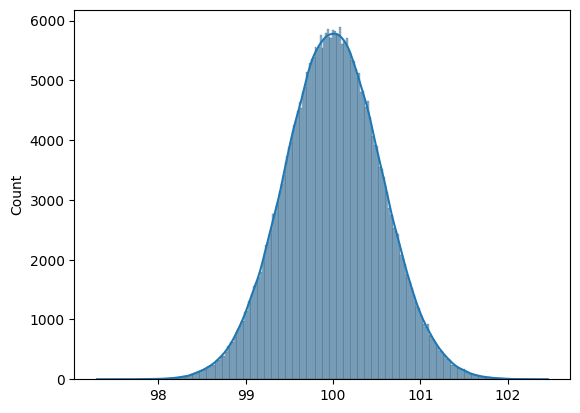

In [ ]:
target = 100
products = np.random.normal(loc = target, scale = .55, size = 400000)
sns.histplot(products, kde = True)

In [ ]:
400000*(.3)*(.3)

36000.0

In [ ]:
profits = {}

for t in [95,96,97,98,99,100,101,102,103]:
  target = t
  liste = []

  products = np.random.normal(loc = target, scale = .55, size = 400000)

  for i in range(10**3):
    revenue = 400000 * .3
    cost = np.array([(.7)*(.3)*(products[i] / 100) for i in range(len(products))]).sum()

    inspection_sample = pd.Series(products).sample( frac = .005 )
    fine = 2000*bool(len(inspection_sample[ inspection_sample < 98 ]))

    liste.append(revenue - cost - fine)

  profits[t] = np.array(liste).mean()

profits

{95: 38200.22202939069,
 96: 37360.35206299771,
 97: 36519.646363040534,
 98: 35679.33697786164,
 99: 34840.132174635786,
 100: 35648.244299235805,
 101: 35158.69742948882,
 102: 34320.74512951333,
 103: 33479.56450966744}